# Домашнее задание 2. Нейронные сети
## Королев Яков ИУ8-83

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача классификации</th>
            <th colspan=5>Задача регрессии</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача регрессии**

A. [Набор данных](https://www.kaggle.com/aungpyaeap/fish-market) Таблица `Fish.csv`. Задача: построить модель, предсказывающую вес рыбы (колонка `Weight`). Baseline: RMSE (root mean square error) = 83.7

B. [Набор данных](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) Таблица `Car details v3.csv`. Задача: построить модель, предсказывающую стоимость автомобиля (колонка `selling_price`). Baseline: RMSE (root mean square error) = 110000

C. [Набор данных](https://www.kaggle.com/quantbruce/real-estate-price-prediction) Таблица `Real estate.csv`. Задача: построить модель, предсказывающую стоимость квадратного метра жилья (колонка `Y house price of unit area`). Baseline: RMSE (root mean square error) = 8

D. [Набор данных](https://www.kaggle.com/mirichoi0218/insurance) Таблица `insurance.csv`. Задача: построить модель, предсказывающую стоимость медицинской страховки (колонка `charges`). Baseline: RMSE (root mean square error) = 5800

E. [Набор данных](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) Объединить таблицы `winequality-white.csv` и `winequality-red.csv`. Задача: построить модель, предсказывающую качество вина (колонка `quality`). Baseline: RMSE (root mean square error) = 0.8


---

**Задача классификации**

K. [Набор данных](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data) Таблица `train.csv`. Задача: детектировать токсичные комментарии (0 или 1 в колонке `toxic`) исключительно по содержимому комментария (колонка `comment_text`). Baseline: sklearn.metrics.f1_score(average='macro') по колонке `toxic` = 0.86

L. [Набор данных](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) Таблица `WA_Fn-UseC_-HR-Employee-Attrition.csv`. Задача: предсказать увольнение сотрудника (колонка `attrition`). Baseline: sklearn.metrics.f1_score(average='macro') = 0.70

M. [Набор данных](https://www.kaggle.com/uciml/sms-spam-collection-dataset) Таблица `spam.csv` (при загрузку датасета в питоне использовать кодировку encoding='latin-1'). Задача: детектировать, является ли СМС-сообщение спамом. Baseline: sklearn.metrics.f1_score(average='macro') = 0.95

N. [Набор данных](https://www.kaggle.com/uciml/pima-indians-diabetes-database) Таблица `diabetes.csv`. Задача: детектировать, есть ли у человека диабет. Baseline: sklearn.metrics.f1_score(average='macro') = 0.73

O. [Набор данных](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) Таблица `healthcare-dataset-stroke-data.csv`. Задача: детектировать, был ли у человека инсульт. Baseline: sklearn.metrics.f1_score(average='macro') = 0.56


# 0. Инициализация библиотек

In [1]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.nn import functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from IPython.display import clear_output
from sklearn.metrics import f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# 1. Искусственная неронная сеть для решения задачи регрессии (9 баллов)

## 1.1 Загрузите данные, поделить на train и test



In [2]:
data = pd.read_csv('C:\\Users\\korol\\Downloads\\B\\Car details v3.csv')

In [3]:
def transformColumn(value):
    values, indexes = pd.factorize(data[value], sort=True)
    return values

def convert_to_float(x):
    res = ''.join(re.findall('[0-9.]+', x))
    return float(res)

def parseTorque(torque):
    if '/' in torque:
        return None
    torque_split = torque.split(' ')

    temp_split = torque_split[0].split('(')
    torque_nm = convert_to_float(temp_split[0])
    if torque_nm < 50:
        torque_nm *= 9.807

    if torque_split.__len__() == 2 or torque_split.__len__() == 3:
        reg_res = re.findall('[-~]', torque_split[1])
        if reg_res:
            temp_split = torque_split[1].split(reg_res[0])
            torque_rmp = (convert_to_float(temp_split[0]) + convert_to_float(temp_split[1])) / 2
        else:
            torque_rmp = convert_to_float(torque_split[1])
    elif torque_split.__len__() == 4:
        if 'at' in torque:
            pos = 2 if torque_split[1] == 'at' else 3
            reg_res = re.findall('[-~]', torque_split[pos])
            if reg_res:
                temp_split = torque_split[pos].split(reg_res[0])
                torque_rmp = (convert_to_float(temp_split[0]) + convert_to_float(temp_split[1])) / 2
            else:
                torque_rmp = convert_to_float(torque_split[pos])
        else:
            return None
    else:
        return None
    if torque_rmp > 5000:
        return None
        
    power = torque_nm * torque_rmp / 9.5488
    return power

data = data.dropna()

data = data.drop(['name'],axis=1)
data['fuel'] = transformColumn('fuel')
data['seller_type'] = transformColumn('seller_type')
data['transmission'] = transformColumn('transmission')
data['owner'] = transformColumn('owner')

data['torque'] = data['torque'].apply(parseTorque)
data = data.dropna()

data['mileage'] = pd.to_numeric(data['mileage'].str.extract(r"\b(\d+)\b")[0], errors="coerce")
data['engine'] = pd.to_numeric(data['engine'].str.extract(r"\b(\d+)\b")[0], errors="coerce")
data['max_power'] = pd.to_numeric(data['max_power'].str.extract(r"\b(\d+)\b")[0], errors="coerce")

data = pd.get_dummies(data)

quant = np.quantile(data['fuel'], 0.60)
data = data[data['fuel']<=quant]

quant = np.quantile(data['selling_price'], 0.60)
data = data[data['selling_price']<=quant]

quant = np.quantile(data['torque'], 0.60)
data = data[data['torque']<=quant]

X = data.drop(['selling_price'],axis=1)
Y = data['selling_price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.10, random_state=0)

## 1.2 По необходимости проведите преодбработку/нормализацию данных

In [4]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((2601, 11), (2601,), (289, 11), (289,))

## 1.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=линейная регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое функцию активации можно не использовать.

Постройте: 1) график loss для train и test в зависимости от используемого количетсва слоёв; 2) график accuracy для train и test в зависимости от используемого количества слоёв.

In [5]:
def objTrain(obj, optim, loss_f, epochs):
    loss_values = []

    for epoch in range(epochs):
        optim.zero_grad()
        obj.train()

        Y_pred = obj.forward(torch.FloatTensor(X_train.values))[:,0]
        
        loss = loss_f(Y_pred, torch.FloatTensor(Y_train.values))
        
        loss.backward()
        optim.step()

        loss_values.append(math.sqrt(loss.item()))

        plt.yscale('Log')
        plt.plot(loss_values)


def objTest(obj, loss_f):
    Y_pred = obj.forward(torch.FloatTensor(X_test.values))[:,0]
    loss = loss_f(Y_pred, torch.FloatTensor(Y_test.values))

    print("Loss: ", math.sqrt(loss.item()))
    return round(math.sqrt(loss.item()), 2)


def objTrainTest(obj, optim, loss_f = F.mse_loss, epochs=1500):
    objTrain(obj, optim, loss_f, epochs)
    return objTest(obj, loss_f)

def numberOfLayers(activation_function, numLayers, inFeat):
    obj = nn.Sequential() 
    for i in range(numLayers):
        if i != numLayers - 1:
            obj.add_module('layer {}'.format(i+1), nn.Linear(in_features=inFeat, out_features=inFeat))
            obj.add_module('activation_function {}'.format(i+1), activation_function) 
        else:
            obj.add_module('layer {}'.format(i+1), nn.Linear(in_features=inFeat, out_features=1))
    return obj

1 Layer

Loss:  197863.54311999975


197863.54

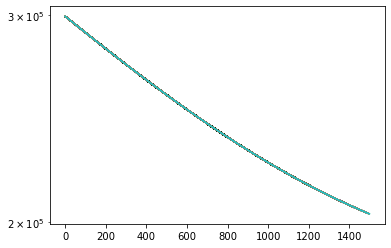

In [6]:
obj = numberOfLayers(nn.ELU(), 1, 11)
objTrainTest(obj, torch.optim.Adam(obj.parameters(), lr=0.001))

2 Layers

Loss:  113654.75638089239


113654.76

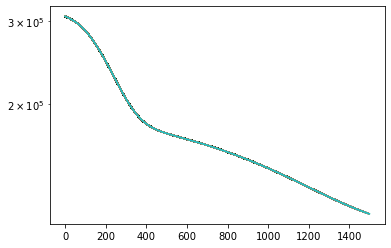

In [7]:
obj = numberOfLayers(nn.ELU(), 2, 11)
objTrainTest(obj, torch.optim.Adam(obj.parameters(), lr=0.001))

3 Layers

Loss:  102470.12598801662


102470.13

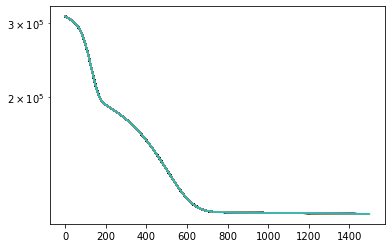

In [8]:
obj = numberOfLayers(nn.ELU(), 3, 11)
objTrainTest(obj, torch.optim.Adam(obj.parameters(), lr=0.001))

4 Layers

Loss:  101965.52327134892


101965.52

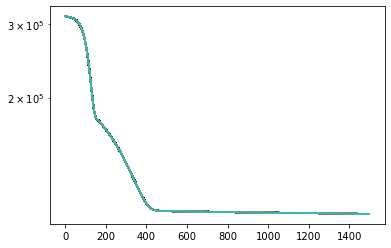

In [9]:
obj = numberOfLayers(nn.ELU(), 4, 11)
objTrainTest(obj, torch.optim.Adam(obj.parameters(), lr=0.001))

## 1.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации: sigmoid, tanh, ReLU, ELU. 

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

ReLU

Loss:  101967.33594637059


101967.34

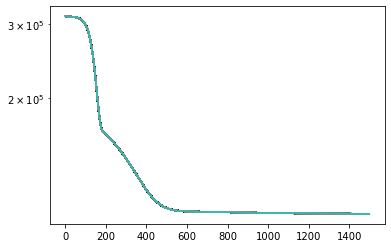

In [10]:
obj = numberOfLayers(nn.ReLU(), 4, 11)
objTrainTest(obj, torch.optim.Adam(obj.parameters(), lr=0.001))

Sigmoid

Loss:  307623.42818452563


307623.43

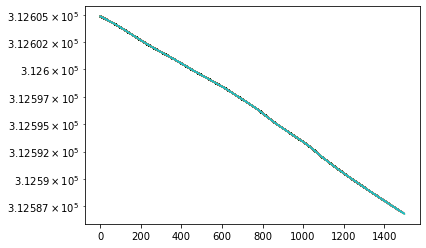

In [11]:
obj = numberOfLayers(nn.Sigmoid(), 4, 11)
objTrainTest(obj, torch.optim.Adam(obj.parameters(), lr=0.001))

Tanh

Loss:  307623.02873484616


307623.03

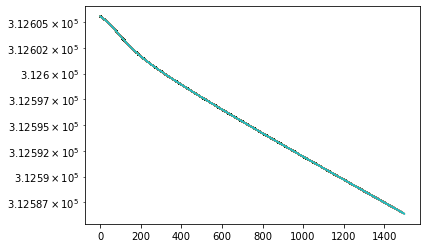

In [12]:
obj = numberOfLayers(nn.Tanh(), 4, 11)
objTrainTest(obj, torch.optim.Adam(obj.parameters(), lr=0.001))

ELU

Loss:  101764.22129609207


101764.22

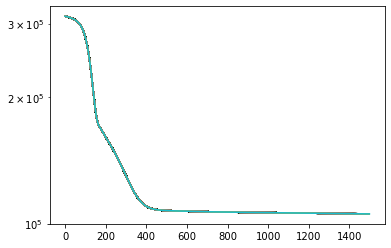

In [13]:
obj = numberOfLayers(nn.ELU(), 4, 11)
objTrainTest(obj, torch.optim.Adam(obj.parameters(), lr=0.001))

## 1.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 1) график loss для train и test в зависимости от используемого  алгоритма оптимизации; 2) график accuracy для train и test в зависимости от используемого  алгоритма оптимизации.

Simple SGD

Loss:  nan


nan

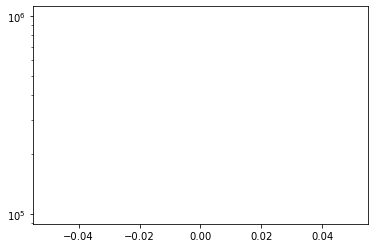

In [14]:
obj = numberOfLayers(nn.ELU(), 4, 11)
objTrainTest(obj, torch.optim.SGD(obj.parameters(), lr=0.001))

SGD with momentum

Loss:  nan


nan

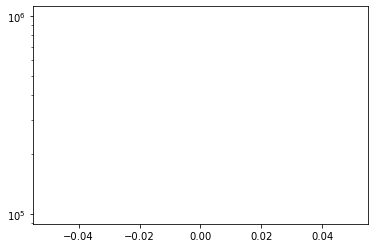

In [15]:
obj = numberOfLayers(nn.ELU(), 4, 11)
objTrainTest(obj, torch.optim.SGD(obj.parameters(), lr=0.001, momentum=0.5))

Adam

Loss:  101423.48382894367


101423.48

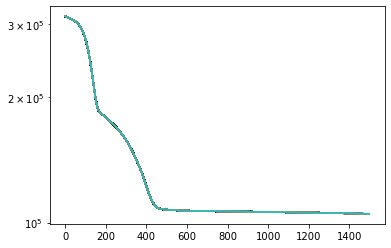

In [16]:
obj = numberOfLayers(nn.ELU(), 4, 11)
objTrainTest(obj, torch.optim.Adam(obj.parameters(), lr=0.001))

RMSprop

Loss:  101300.69425231004


101300.69

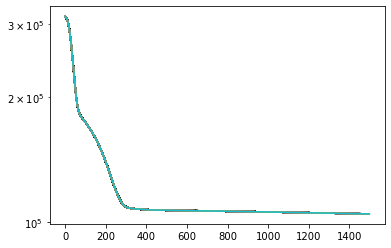

In [17]:
obj = numberOfLayers(nn.ELU(), 4, 11)
objTrainTest(obj, torch.optim.RMSprop(obj.parameters(), lr=0.001))

## 1.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 1) график loss для train и test в зависимости от используемой конфигурации; 2) график accuracy для train и test в зависимости от используемой конфигурации.

In [18]:
def batchDropFunct(activation_function, numLayers, inFeat, batchNorm,dropout,  num):
    obj = nn.Sequential() 
    for i in range(numLayers):
        if i != numLayers - 1:
            
            obj.add_module('layer {}'.format(i+1), nn.Linear(in_features=inFeat, out_features=inFeat))
            
            if batchNorm:
                obj.add_module('batchNorm 1', nn.BatchNorm1d(inFeat))
            if dropout:
                obj.add_module('dropout 0', nn.Dropout(p=num))
                
            obj.add_module('activation_function {}'.format(i+1), activation_function)
        else:
            obj.add_module('layer {}'.format(i+1), nn.Linear(in_features=inFeat, out_features=1))
    return obj

BatchNorm


Loss:  301089.0866172336


301089.09

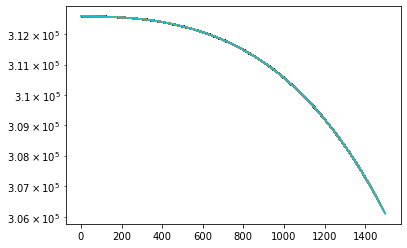

In [19]:
obj = batchDropFunct(nn.ELU(), 4, 11, True, False, 0.2)
objTrainTest(obj, torch.optim.RMSprop(obj.parameters(), lr=0.001))

Dropout 0.2


Loss:  102501.61458240548


102501.61

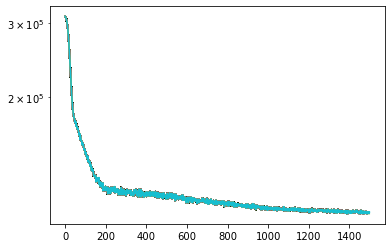

In [20]:
obj = batchDropFunct(nn.ELU(), 4, 11, False, True, 0.2)
objTrainTest(obj, torch.optim.RMSprop(obj.parameters(), lr=0.001))

Dropout 0.5

Loss:  109927.97409212998


109927.97

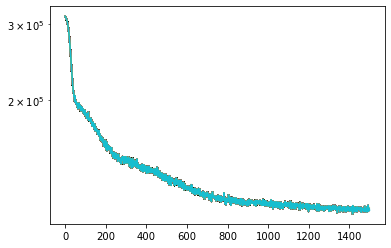

In [21]:
obj = batchDropFunct(nn.ELU(), 4, 11, False, True, 0.5)
objTrainTest(obj, torch.optim.RMSprop(obj.parameters(), lr=0.001))

BatchNorm + Dropout 0.2

Loss:  290608.165170905


290608.17

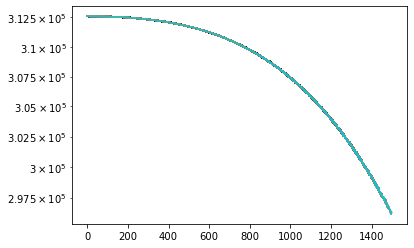

In [22]:
obj = batchDropFunct(nn.ELU(), 4, 11, True, True, 0.2)
objTrainTest(obj, torch.optim.RMSprop(obj.parameters(), lr=0.001))

BatchNorm + Dropout 0.5

Loss:  298545.47788904794


298545.48

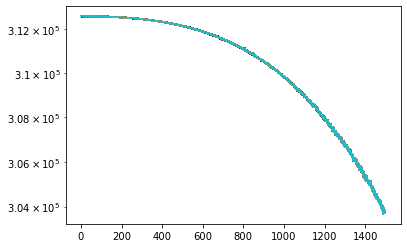

In [23]:
obj = batchDropFunct(nn.ELU(), 4, 11, True, True, 0.5)
objTrainTest(obj, torch.optim.RMSprop(obj.parameters(), lr=0.001))

MSE chart

## 1.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

Loss:  101300.69425231004


101300.69

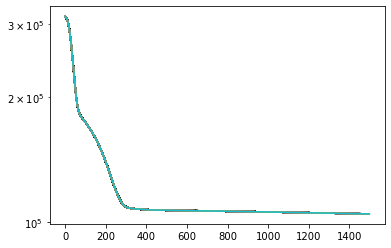

In [17]:
obj = numberOfLayers(nn.ELU(), 4, 11)
objTrainTest(obj, torch.optim.RMSprop(obj.parameters(), lr=0.001))

## 1.8 Выводы

Самый лучший результат показала 3-х слойная сеть с алгоритмом оптимизации RMSprop и функцией активации ELU. Loss: 101300.69425231004

# 2. Искусственная неронная сеть для решения задачи классификации (9 баллов)

## 2.1 Загружаем и нормализуем данные



In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [26]:
data = pd.read_csv('C:\\Users\\korol\\Downloads\\L\\WA_Fn-UseC_-HR-Employee-Attrition.csv')

## 2.2 Разделение на train и test

In [27]:
def transformColumn(value):
    values, indexes = pd.factorize(data[value], sort=True)
    return values


data = data.dropna()


data['Attrition'] = transformColumn('Attrition')
data['BusinessTravel'] = transformColumn('BusinessTravel')
data['Department'] = transformColumn('Department')
data['EducationField'] = transformColumn('EducationField')
data['Gender'] = transformColumn('Gender')
data['JobRole'] = transformColumn('JobRole')
data['MaritalStatus'] = transformColumn('MaritalStatus')
data['Over18'] = transformColumn('Over18')
data['OverTime'] = transformColumn('OverTime')

X = data.drop(['Attrition'],axis=1)
Y = data['Attrition']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.10, random_state=10)

In [28]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1323, 34), (1323,), (147, 34), (147,))

## 2.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=логистическая регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое в качестве функции активации используйте сигмоиду.

Постройте: 1) график loss для train и test в зависимости от используемого количетсва слоёв; 2) график accuracy для train и test в зависимости от используемого количества слоёв.

In [29]:
def objTrain(obj, optim, loss_f, epochs):
    loss_values = []
    loss_valuesTest = []
    accHis = []
    accHisTest = []
    for epoch in range(epochs):
        optim.zero_grad()
        obj.train()

        Y_predTest = obj.forward(torch.FloatTensor(X_test.values))
        loss_valuesTest.append(loss_f(Y_predTest, torch.LongTensor(Y_test.values)).item())
        accHisTest.append(accuracy_score(Y_test, np.argmax(Y_predTest.detach().numpy(), axis=1)))
        
        Y_pred = obj.forward(torch.FloatTensor(X_train.values))
        loss = loss_f(Y_pred, torch.LongTensor(Y_train.values))
        accHis.append(accuracy_score(Y_train, np.argmax(Y_pred.detach().numpy(), axis=1)))

        loss.backward()
        optim.step()

        loss_values.append(loss.item())

    plt.plot(loss_values)
    plt.plot(loss_valuesTest)
    plt.yscale('Log')
    plt.show()


    plt.plot(accHisTest)
    plt.yscale('Log')
    plt.show()

def objTest(obj, loss_f):
    Y_pred = obj.forward(torch.FloatTensor(X_test.values))
    loss = loss_f(Y_pred, torch.LongTensor(Y_test.values))
    
    Y_predRes = np.argmax(Y_pred.detach().numpy(), axis=1)
    print(classification_report(Y_test, Y_predRes, zero_division=0))
    print('f1_score: ', f1_score(Y_test, Y_predRes, average='macro'))
    return loss.item()

def objTrainTest(obj, optim, loss_f = F.nll_loss, epochs=1500):
    objTrain(obj, optim, loss_f, epochs)
    return objTest(obj, loss_f)

def numberOfLayers(activation_function, numLayers, inFeat):
    obj = nn.Sequential() 
    for i in range(numLayers):
        if i != numLayers - 1:
            obj.add_module('layer {}'.format(i+1), nn.Linear(in_features=inFeat, out_features=inFeat))
            obj.add_module('activation_function {}'.format(i+1), activation_function) 
        else:
            obj.add_module('layer {}'.format(i+1), nn.Linear(in_features=inFeat, out_features=2))
            obj.add_module('layerS', nn.LogSoftmax(dim=1))
    return obj

1 Layer

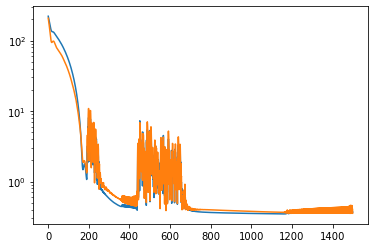

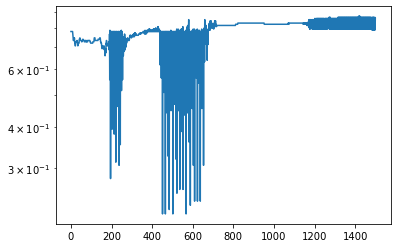

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       115
           1       1.00      0.03      0.06        32

    accuracy                           0.79       147
   macro avg       0.89      0.52      0.47       147
weighted avg       0.83      0.79      0.70       147

f1_score:  0.4709160571229537


0.4620600640773773

In [30]:
torch.manual_seed(22)
lr1=0.001
obj = numberOfLayers(nn.ELU(), 1, 34)
objTrainTest(obj, torch.optim.Adam(obj.parameters(), lr=lr1))

2 Layers

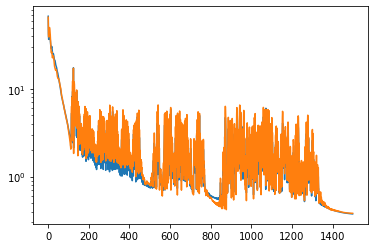

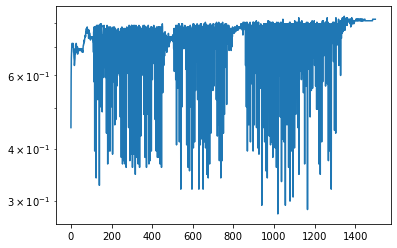

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       115
           1       0.69      0.28      0.40        32

    accuracy                           0.82       147
   macro avg       0.76      0.62      0.65       147
weighted avg       0.80      0.82      0.78       147

f1_score:  0.6457831325301204


0.3814246356487274

In [31]:
obj = numberOfLayers(nn.ELU(), 2, 34)
objTrainTest(obj, torch.optim.Adam(obj.parameters(), lr=lr1))

3 Layers

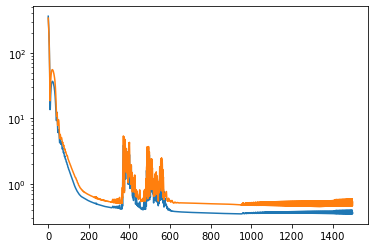

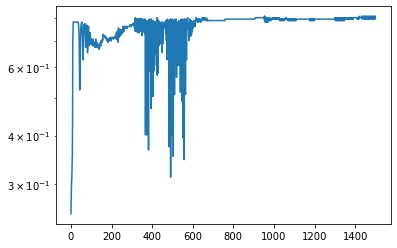

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       115
           1       0.56      0.47      0.51        32

    accuracy                           0.80       147
   macro avg       0.71      0.68      0.69       147
weighted avg       0.79      0.80      0.80       147

f1_score:  0.6925351604760188


0.46380069851875305

In [32]:
obj = numberOfLayers(nn.ELU(), 3, 34)
objTrainTest(obj, torch.optim.Adam(obj.parameters(), lr=lr1))

4 Layers

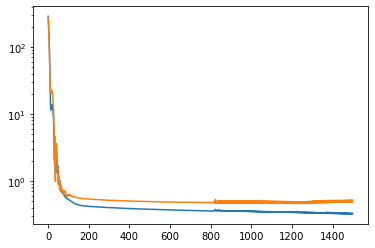

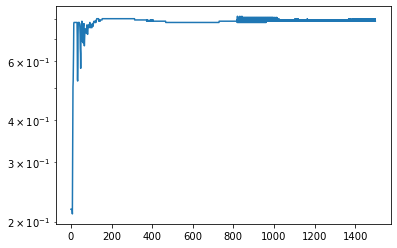

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       115
           1       0.60      0.28      0.38        32

    accuracy                           0.80       147
   macro avg       0.71      0.61      0.63       147
weighted avg       0.78      0.80      0.77       147

f1_score:  0.6327849082608321


0.48534202575683594

In [33]:
obj = numberOfLayers(nn.ELU(), 4, 34)
objTrainTest(obj, torch.optim.Adam(obj.parameters(), lr=lr1))

## 2.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации на промежуточных слоях: sigmoid, tanh, ReLU, ELU. На выходном слое в качестве функции активации используйте сигмоиду.

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

Sigmoid

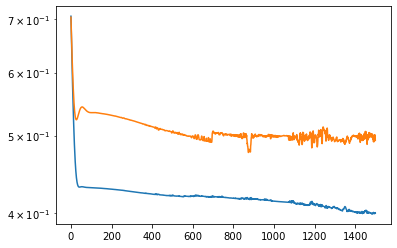

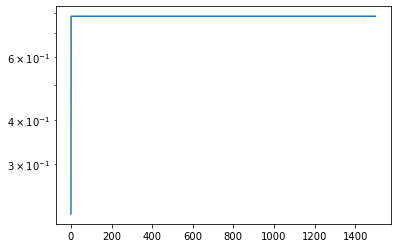

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       115
           1       0.00      0.00      0.00        32

    accuracy                           0.78       147
   macro avg       0.39      0.50      0.44       147
weighted avg       0.61      0.78      0.69       147

f1_score:  0.4389312977099237


0.4996166527271271

In [34]:
obj = numberOfLayers(nn.Sigmoid(), 4, 34)
objTrainTest(obj, torch.optim.Adam(obj.parameters(), lr=lr1))

Tanh

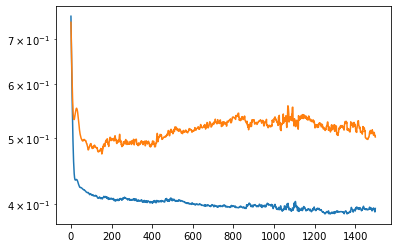

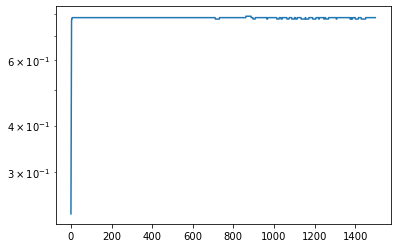

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       115
           1       0.00      0.00      0.00        32

    accuracy                           0.78       147
   macro avg       0.39      0.50      0.44       147
weighted avg       0.61      0.78      0.69       147

f1_score:  0.4389312977099237


0.5022098422050476

In [35]:
obj = numberOfLayers(nn.Tanh(), 4, 34)
objTrainTest(obj, torch.optim.Adam(obj.parameters(), lr=lr1))

ReLU

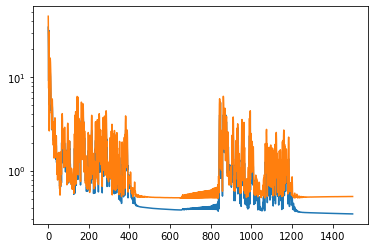

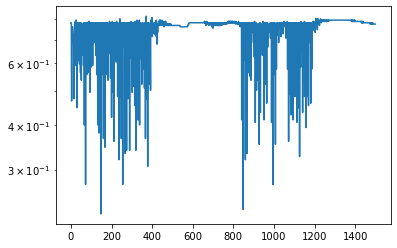

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       115
           1       0.33      0.03      0.06        32

    accuracy                           0.78       147
   macro avg       0.56      0.51      0.46       147
weighted avg       0.69      0.78      0.70       147

f1_score:  0.46486486486486484


0.5268079042434692

In [36]:
obj = numberOfLayers(nn.ReLU(), 4, 34)
objTrainTest(obj, torch.optim.Adam(obj.parameters(), lr=lr1))

ELU

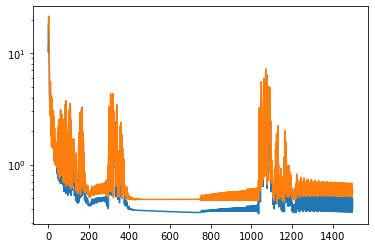

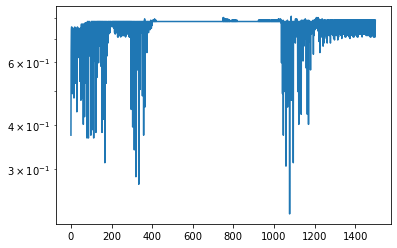

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       115
           1       0.00      0.00      0.00        32

    accuracy                           0.78       147
   macro avg       0.39      0.50      0.44       147
weighted avg       0.61      0.78      0.69       147

f1_score:  0.4389312977099237


0.6759865880012512

In [37]:
obj = numberOfLayers(nn.ELU(), 4, 34)
objTrainTest(obj, torch.optim.Adam(obj.parameters(), lr=lr1))

## 2.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 1) график loss для train и test в зависимости от используемого  алгоритма оптимизации; 2) график accuracy для train и test в зависимости от используемого  алгоритма оптимизации.

SDG

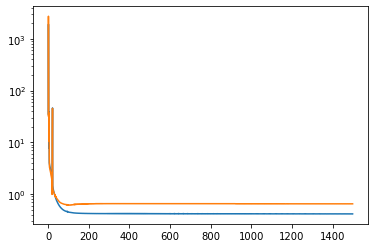

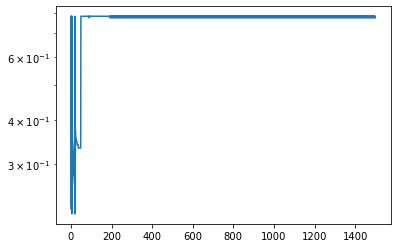

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       115
           1       0.00      0.00      0.00        32

    accuracy                           0.78       147
   macro avg       0.39      0.50      0.44       147
weighted avg       0.61      0.78      0.69       147

f1_score:  0.4389312977099237


0.6484836935997009

In [38]:
obj = numberOfLayers(nn.ELU(), 4, 34)
objTrainTest(obj, torch.optim.SGD(obj.parameters(), lr=lr1))

 SGD with momentum

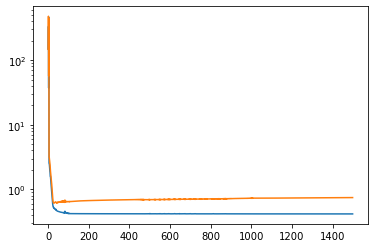

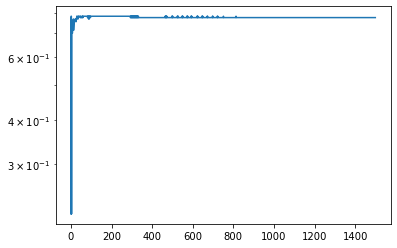

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       115
           1       0.00      0.00      0.00        32

    accuracy                           0.78       147
   macro avg       0.39      0.50      0.44       147
weighted avg       0.61      0.78      0.68       147

f1_score:  0.43678160919540227


0.7440797090530396

In [39]:
obj = numberOfLayers(nn.ELU(), 4, 34)
objTrainTest(obj, torch.optim.SGD(obj.parameters(), lr=lr1, momentum=0.5))

 Adam

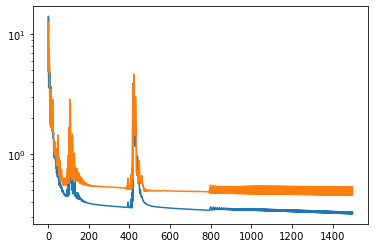

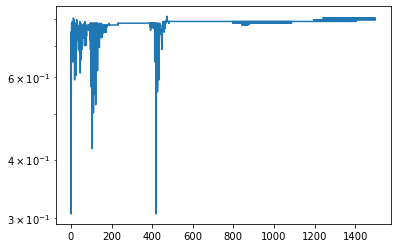

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       115
           1       0.62      0.25      0.36        32

    accuracy                           0.80       147
   macro avg       0.72      0.60      0.62       147
weighted avg       0.78      0.80      0.77       147

f1_score:  0.6195448460508701


0.45608535408973694

In [40]:
obj = numberOfLayers(nn.ELU(), 4, 34)
objTrainTest(obj, torch.optim.Adam(obj.parameters(), lr=lr1))

RMSprop

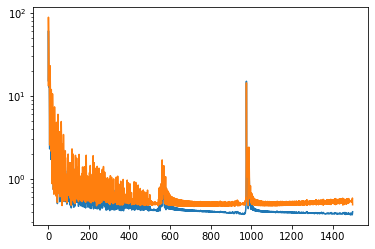

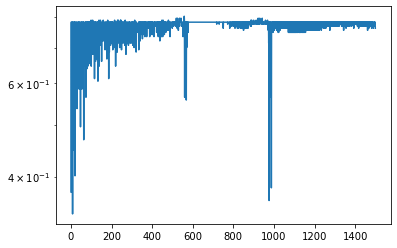

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       115
           1       0.00      0.00      0.00        32

    accuracy                           0.78       147
   macro avg       0.39      0.50      0.44       147
weighted avg       0.61      0.78      0.69       147

f1_score:  0.4389312977099237


0.6081045866012573

In [41]:
obj = numberOfLayers(nn.ELU(), 4, 34)
objTrainTest(obj, torch.optim.RMSprop(obj.parameters(), lr=lr1))

## 2.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 1) график loss для train и test в зависимости от используемой конфигурации; 2) график accuracy для train и test в зависимости от используемой конфигурации.

In [42]:
def batchDropFunct(activation_function, numLayers, inFeat, batchNorm,dropout,  num):
    obj = nn.Sequential() 
    for i in range(numLayers):
        if i != numLayers - 1:
            
            obj.add_module('layer {}'.format(i+1), nn.Linear(in_features=inFeat, out_features=inFeat))
            
            if batchNorm:
                obj.add_module('batchNorm 1', nn.BatchNorm1d(inFeat))
            if dropout:
                obj.add_module('dropout 0', nn.Dropout(p=num))
                
            obj.add_module('activation_function {}'.format(i+1), activation_function)
        else:
            obj.add_module('layer {}'.format(i+1), nn.Linear(in_features=inFeat, out_features=2))
            obj.add_module('layerS', nn.LogSoftmax(dim=1))
    return obj

BatchNorm

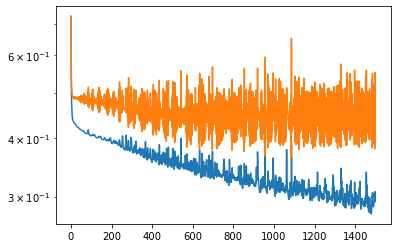

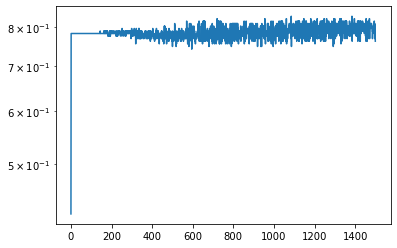

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       115
           1       0.69      0.28      0.40        32

    accuracy                           0.82       147
   macro avg       0.76      0.62      0.65       147
weighted avg       0.80      0.82      0.78       147

f1_score:  0.6457831325301204


0.41151943802833557

In [43]:
obj = batchDropFunct(nn.ELU(), 4, 34, True, False, 0.2)
objTrainTest(obj, torch.optim.RMSprop(obj.parameters(), lr=lr1))

Dropout 0.2

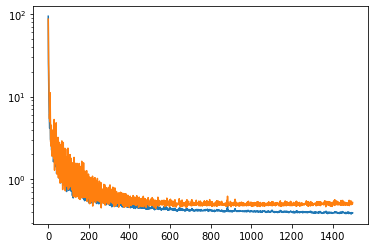

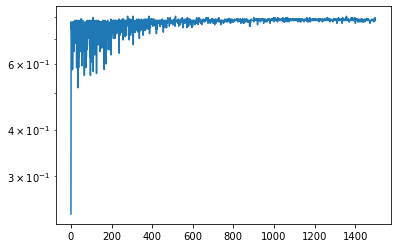

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       115
           1       1.00      0.03      0.06        32

    accuracy                           0.79       147
   macro avg       0.89      0.52      0.47       147
weighted avg       0.83      0.79      0.70       147

f1_score:  0.4709160571229537


0.4980993866920471

In [44]:
obj = batchDropFunct(nn.ELU(), 4, 34, False, True, 0.2)
objTrainTest(obj, torch.optim.RMSprop(obj.parameters(), lr=lr1))

Dropout 0.5

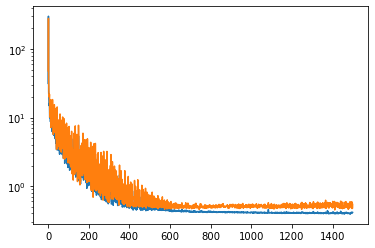

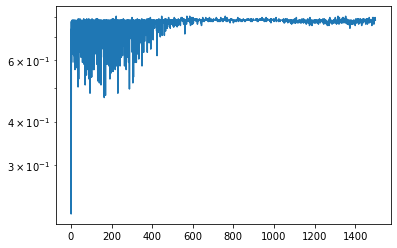

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       115
           1       0.50      0.03      0.06        32

    accuracy                           0.78       147
   macro avg       0.64      0.51      0.47       147
weighted avg       0.72      0.78      0.70       147

f1_score:  0.4678733031674209


0.5152342915534973

In [45]:
obj = batchDropFunct(nn.ELU(), 4, 34, False, True, 0.5)
objTrainTest(obj, torch.optim.RMSprop(obj.parameters(), lr=lr1))

BatchNorm + Dropout 0.2

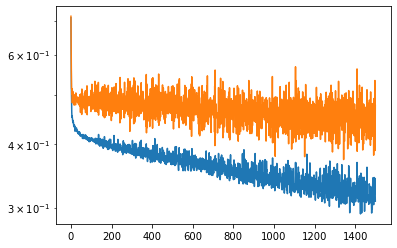

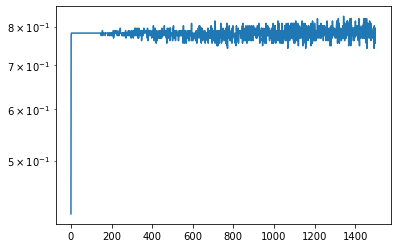

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       115
           1       0.73      0.25      0.37        32

    accuracy                           0.82       147
   macro avg       0.78      0.61      0.63       147
weighted avg       0.80      0.82      0.78       147

f1_score:  0.6322616510701381


0.38308775424957275

In [46]:
obj = batchDropFunct(nn.ELU(), 4, 34, True, True, 0.2)
objTrainTest(obj, torch.optim.RMSprop(obj.parameters(), lr=lr1))

BatchNorm + Dropout 0.5

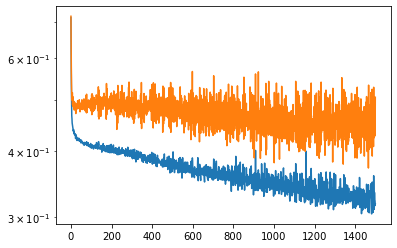

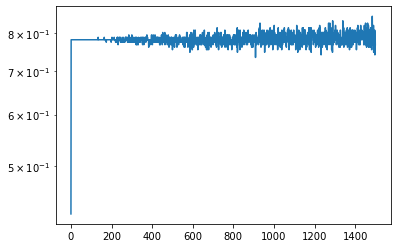

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       115
           1       0.64      0.28      0.39        32

    accuracy                           0.81       147
   macro avg       0.73      0.62      0.64       147
weighted avg       0.79      0.81      0.78       147

f1_score:  0.6392005610098176


0.4020061492919922

In [47]:
obj = batchDropFunct(nn.ELU(), 4, 34, True, True, 0.25)
objTrainTest(obj, torch.optim.RMSprop(obj.parameters(), lr=lr1))

## 2.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

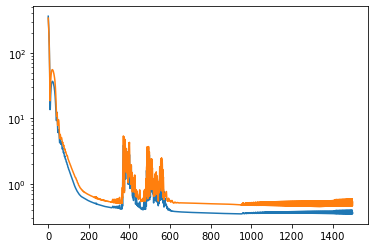

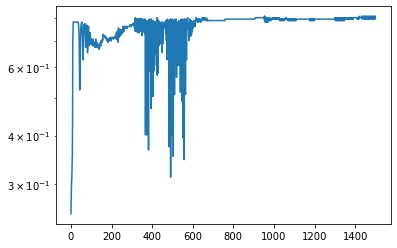

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       115
           1       0.56      0.47      0.51        32

    accuracy                           0.80       147
   macro avg       0.71      0.68      0.69       147
weighted avg       0.79      0.80      0.80       147

f1_score:  0.6925351604760188


0.46380069851875305

In [32]:
obj = numberOfLayers(nn.ELU(), 3, 34)
objTrainTest(obj, torch.optim.Adam(obj.parameters(), lr=lr1))

## 2.8 Выводы

Самый лучший результат показала 3-х слойная сеть с алгоритмом оптимизации Adam и функцией активации ELU. f1_score:  0.6925351604760188